# Li2021 validations

In [15]:
from li2021 import get_li2021
from mxlpy import units
import mxlbricks.names as n
import matplotlib.pyplot as plt

m = get_li2021()
file_prepend = "presentation"  # Path to save figures
file_append = "li2021"  # Identifier for the model validation

In [16]:
pfd_str = "PAR"
vc_str = None
atp_str = None
nadph_str = n.nadph()
flourescence_str = None
co2_str = n.co2()
pco2_str = None
H_cp_co2_str = None
gammastar_str = None
r_light_str = None
A_str = None
coeff_psii_str = "k_recomb"
coeff_psi_str = "PSI_antenna_size"
coeff_rubisco_str = None
coeff_cytb6f_str = "b6f_content"
coeff_atp_synthase_str = None
rubp_str = n.rubp()
pq_str = n.pq_ox()
pc_str = n.pc_ox()
v_psii_str = "PSII"
v_psi_str = "PSI"
v_cytb6f_str = "v_b6f"
v_atp_synthase_str = None

## Day simulation

INFO:root:Downloading 1 NEON DP1.00024.001 files totaling approximately 16.6 MB.


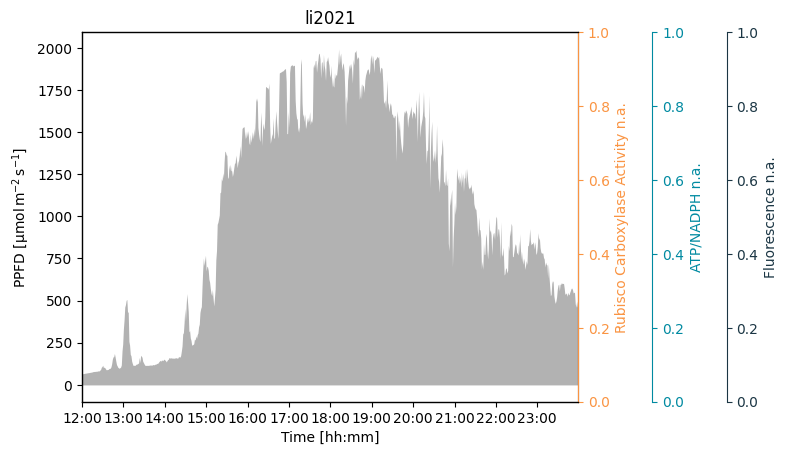

In [17]:
from day_simulation import create_day_simulation_fig

fig, ax = create_day_simulation_fig(
    model=m,
    pfd=pfd_str,
    vc=vc_str,
    atp=atp_str,
    nadph=nadph_str,
    flourescence=flourescence_str
)

ax.set_title(file_append)

plt.savefig(f"{file_prepend}/day_simulation/{file_append}.png", dpi=300, bbox_inches='tight')

## Pam Fig

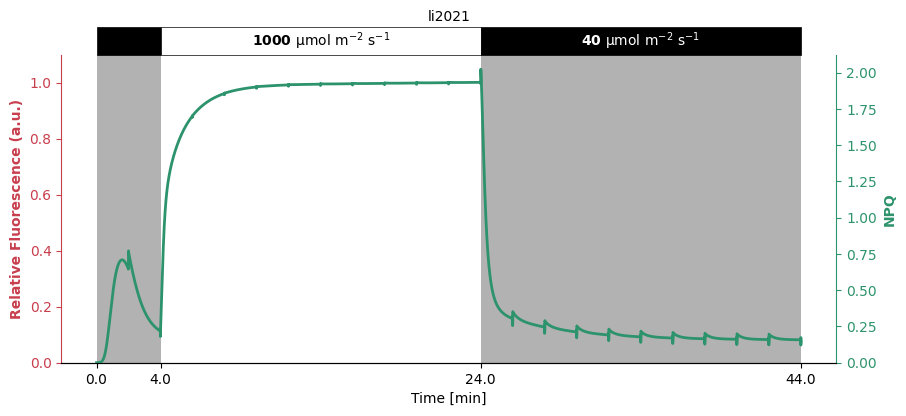

In [18]:
from pam_fig import create_pam_fig

fig, axs = create_pam_fig(
    model=m,
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str="NPQ"
)

axs["Fluo"].text(0.5, 1.1, file_append, ha='center', va='bottom', transform=axs["Fluo"].transAxes)

plt.savefig(f"{file_prepend}/pam_fig/{file_append}.png", dpi=300, bbox_inches='tight');

## FvCB

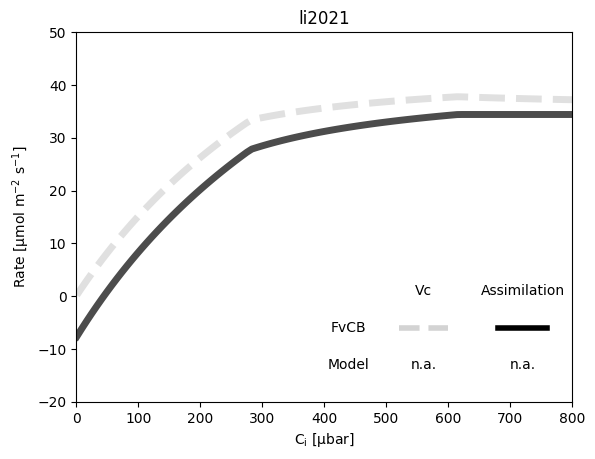

In [19]:
from inject_fvcb import create_fvcb_fig

fig, ax = create_fvcb_fig(
    model=m,
    pfd=pfd_str,
    co2=co2_str,
    vc=vc_str,
    pco2=pco2_str,
    H_cp_co2=H_cp_co2_str,
    gammastar=gammastar_str,
    r_light=r_light_str,
    A=A_str
)

ax.set_title(file_append)

plt.savefig(f"{file_prepend}/fvcb/{file_append}.png", dpi=300, bbox_inches='tight')

## MCA

In [20]:
from photosynthesis_mca import create_mca_fig

fig, ax = create_mca_fig(
    model=m,
    coeff_psii=coeff_psii_str,
    coeff_psi=coeff_psi_str,
    coeff_rubisco=coeff_rubisco_str,
    coeff_cytb6f=coeff_cytb6f_str,
    coeff_atp_synthase=coeff_atp_synthase_str,
    rubp=rubp_str,
    co2=co2_str,
    pq=pq_str,
    pc=pc_str,
    atp=atp_str,
    nadph=nadph_str,
    v_rubisco=vc_str,
    v_psii=v_psii_str,
    v_psi=v_psi_str,
    v_cytb6f=v_cytb6f_str,
    v_atp_synthase=v_atp_synthase_str,
)

fig.suptitle(file_append)

plt.savefig(f"{file_prepend}/mca/{file_append}.png", dpi=300, bbox_inches='tight')

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7bc5ca651da0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 1000x500 with 3 Axes>

## Fitting

  0%|          | 0/43 [00:00<?, ?it/s][ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 19505650.4619755 and h = 38032180.7145773, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 15832338.2089039 and h = 34050323.8739952, the corrector convergence test failed repeatedly or with |h| = hmin.
 56%|█████▌    | 24/43 [00:00<00:00, 35.62it/s][ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 6275772.94056768 and h = 47225874.1288527, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8

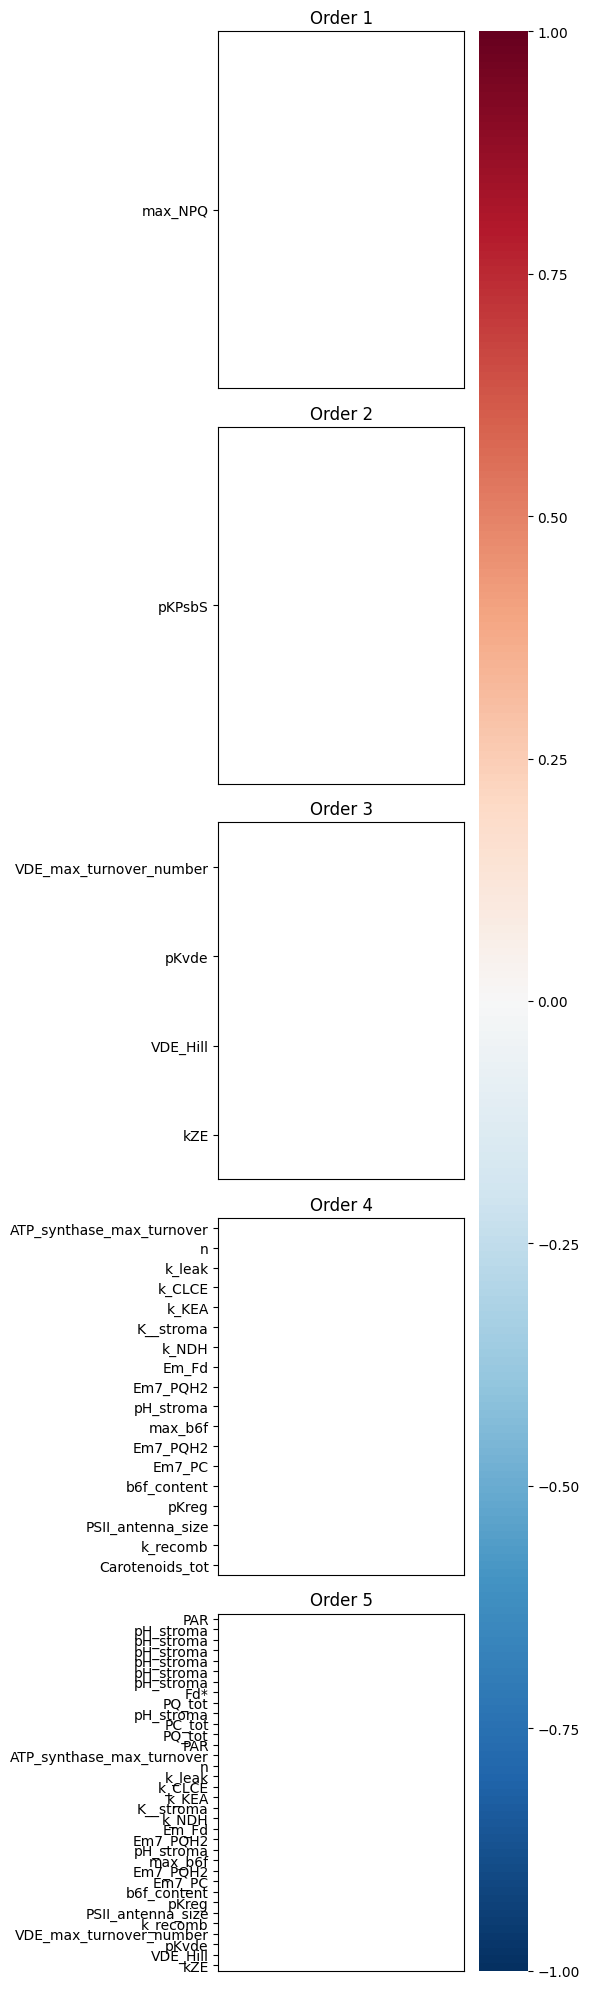

In [9]:
from utils import find_params_to_fit_byelasticities, find_params_to_fit_byorder

find_params_to_fit_byorder(
    to_fit_str="NPQ",
    model=m,
)

In [10]:
find_params_to_fit_byelasticities(
    to_fit_str="NPQ",
    model=m,
    omit_strs=["pH", "T", "R", "F", "E^0_PQ", "E^0_QA", "HPR", "PSII_total", "LHC_tot"]
)

  0%|          | 0/43 [00:00<?, ?it/s][ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 19505650.4619755 and h = 38032180.7145773, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 15832338.2089039 and h = 34050323.8739952, the corrector convergence test failed repeatedly or with |h| = hmin.
  9%|▉         | 4/43 [00:00<00:06,  6.05it/s][ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 6275772.94056768 and h = 47225874.1288527, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:81

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7ee03f4a5da0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 400x1500 with 1 Axes>

[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.00148110843571872 and h = 4.96136132088854e-13, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.00148110843571868 and h = 4.96136115352695e-13, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.0014811084357188 and h = 4.961361993696e-13, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.00148110843571884 and h = 4.96136208

No result from dark simulation


[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.00391386865010627 and h = 7.17887066041606e-13, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.00391386865010624 and h = 7.17887063336473e-13, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.00391386865010647 and h = 7.17887109041941e-13, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.00391386865010576 and h = 7.17886

No result from dark simulation


[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.425769805966772 and h = 0.00238891277904745, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.393985243029567 and h = 0.000185818365721517, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.425662902136816 and h = 0.00205163637527026, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1744094662001/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 0.393325882145332 and h = 0.000138890745692

{'gamma2': 0.0014995487117419604, 'gamma3': 0.7579855483001685, 'NADPH': 0.7976071476138191, 'kZSat': 0.002080164361322412}


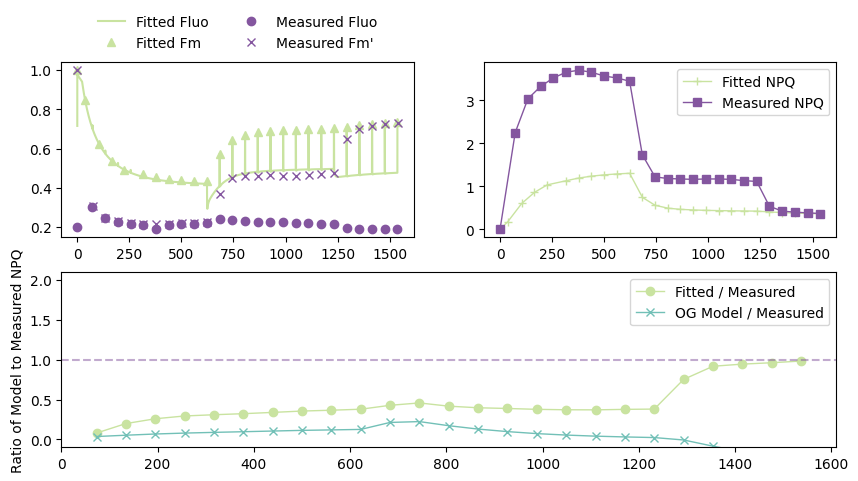

In [9]:
from fitting import create_pamfit

create_pamfit(
    model=m,
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    pam_params_to_fit=["gamma2", "gamma3", "NADPH", "kZSat"],
    relative=True,
    standard_scale=True
)

plt.savefig(f"{file_prepend}/fitting/{file_append}.png", dpi=300)